## Lego-Datensatz

 ### Importieren der benötigten Bibliotheken

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
from sklearn.preprocessing import OneHotEncoder

In [234]:
file_path = 'output.csv'
lego_data = pd.read_csv(file_path)

In [235]:
lego_data_info = lego_data.info()
lego_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          890 non-null    object 
 1   price                                         890 non-null    float64
 2   link_picture                                  890 non-null    object 
 3   Produkttyp                                    769 non-null    object 
 4   Vorgeschlagenes Geschlecht                    740 non-null    object 
 5   Empfohlenes Alter in Jahren (mind.)           767 non-null    object 
 6   Empfohlenes Alter in Jahren (max.)            750 non-null    object 
 7   Anzahl Teile                                  765 non-null    object 
 8   Sound-Effekte                                 751 non-null    object 
 9   Produktfarbe                                  769 non-null    obj

In [236]:
lego_data_head = lego_data.head()
lego_data_head

,name,price,link_picture,Produkttyp,Vorgeschlagenes Geschlecht,Empfohlenes Alter in Jahren (mind.),Empfohlenes Alter in Jahren (max.),Anzahl Teile,Sound-Effekte,Produktfarbe,...,Versandkarton pro Palettenlage,Anzahl Produkte pro Versandkarton,Hauptkarton GTIN (EAN/UPC),Lagenanzahl pro Palette,Produkte pro Palettenlage,Fernbedienung erforderlich,Warnung vor Erstickungsgefahr,Fernbedienung enthalten,Akkus/Batterien enthalten,null
0,LEGO Harry Potter Schloss Hogwarts™ mit Schlos...,179.00,https://www.fcw.ch/api/ProcessRequest/191538/B...,Bausatz,Junge/Mädchen,18 Jahr(e),99 Jahr(e),2660 Stück(e),,Mehrfarbig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LEGO Disney - Kamera – Hommage an Walt Disney ...,119.00,https://www.fcw.ch/api/ProcessRequest/191541/B...,Bausatz,Junge/Mädchen,18 Jahr(e),99 Jahr(e),811 Stück(e),,Mehrfarbig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LEGO Technic - Audi RS Q e-tron (42160),159.00,https://www.fcw.ch/api/ProcessRequest/190646/B...,Bausatz,Junge/Mädchen,10 Jahr(e),99 Jahr(e),914 Stück(e),,Mehrfarbig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LEGO Technic - Lamborghini Huracán Tecnica (42...,59.95,https://www.fcw.ch/api/ProcessRequest/190611/B...,Bausatz,Junge/Mädchen,9 Jahr(e),99 Jahr(e),806 Stück(e),,Mehrfarbig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO City - Personen-Schnellzug (60337),169.00,https://www.fcw.ch/api/ProcessRequest/138905/B...,Bausatz,Junge/Mädchen,7 Jahr(e),99 Jahr(e),764 Stück(e),,Mehrfarbig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Datenaufbereitung

In [237]:
# Analyse der fehlenden Werte im Datensatz
missing_values = lego_data.isnull().sum()
missing_percentage = (missing_values / len(lego_data)) * 100

# Erstellen einer Tabelle zur Darstellung der fehlenden Werte und deren Anteile
missing_data_analysis = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_data_analysis.sort_values(by="Percentage (%)", ascending=False).head(10)  # Anzeige der Top 10 Spalten mit den meisten fehlenden Werten

,Missing Values,Percentage (%)
Freigabedatum (TT/MM/JJ),779,87.528090
Warnung vor Erstickungsgefahr,777,87.303371
Fernbedienung enthalten,775,87.078652
Fernbedienung erforderlich,775,87.078652
Anzahl der Versandkartons pro Vorlagenkarton,766,86.067416
Anzahl der Pakete,761,85.505618
EU TSD Sprache,758,85.168539
null,753,84.606742
Nettogewicht Hauptkarton,748,84.044944
Figur enthalten,743,83.483146


In [238]:
# Entfernung von Spalten mit mehr als 80% fehlenden Werten
columns_to_drop = missing_data_analysis[missing_data_analysis['Percentage (%)'] > 80].index
lego_data_cleaned = lego_data.drop(columns=columns_to_drop)

# Überprüfung der Spalten nach Entfernung
remaining_columns = lego_data_cleaned.columns

# Analyse der fehlenden Werte in den verbleibenden Spalten
missing_values_remaining = lego_data_cleaned.isnull().sum()
missing_percentage_remaining = (missing_values_remaining / len(lego_data_cleaned)) * 100

# Aktualisierte Analyse der fehlenden Werte
missing_data_remaining_analysis = pd.DataFrame({'Missing Values': missing_values_remaining, 'Percentage (%)': missing_percentage_remaining})
missing_data_remaining_analysis.sort_values(by="Percentage (%)", ascending=False).head(10)  # Anzeige der Top 10 Spalten mit den meisten fehlenden Werten in den verbleibenden Daten


,Missing Values,Percentage (%)
Montagezeit,702,78.876404
Menge pro Packung,702,78.876404
Akkus/Batterien enthalten,457,51.348315
ASIN,248,27.865169
Batterien erforderlich,209,23.483146
Sicherheitswarnung,201,22.584270
Montage erforderlich,193,21.685393
Material,192,21.573034
Ursprungsland,192,21.573034
Vorgeschlagenes Geschlecht,150,16.853933


In [239]:
# Entfernung weiterer Spalten mit hohem Anteil an fehlenden Werten
additional_columns_to_drop = missing_data_remaining_analysis[missing_data_remaining_analysis['Percentage (%)'] > 50].index
lego_data_cleaned_further = lego_data_cleaned.drop(columns=additional_columns_to_drop)

# Analyse der fehlenden Werte in den verbleibenden Spalten nach weiterer Bereinigung
missing_values_further_cleaned = lego_data_cleaned_further.isnull().sum()
missing_percentage_further_cleaned = (missing_values_further_cleaned / len(lego_data_cleaned_further)) * 100

# Aktualisierte Analyse der fehlenden Werte
missing_data_further_cleaned_analysis = pd.DataFrame({'Missing Values': missing_values_further_cleaned, 'Percentage (%)': missing_percentage_further_cleaned})
missing_data_further_cleaned_analysis.sort_values(by="Percentage (%)", ascending=False).head(10)  # Anzeige der Top 10 Spalten mit den meisten fehlenden Werten in den weiter bereinigten Daten


,Missing Values,Percentage (%)
ASIN,248,27.865169
Batterien erforderlich,209,23.483146
Sicherheitswarnung,201,22.584270
Montage erforderlich,193,21.685393
Material,192,21.573034
Ursprungsland,192,21.573034
Vorgeschlagenes Geschlecht,150,16.853933
Verpackungshöhe,145,16.292135
Paketgewicht,145,16.292135
Verpackungsbreite,144,16.179775


In [240]:
# Entfernung von Zeilen mit fehlenden "ASIN"-Werten
lego_data_cleaned_further = lego_data_cleaned_further.dropna(subset=['ASIN'])

# Auffüllen der fehlenden Werte in "Batterien erforderlich" mit dem häufigsten Wert
most_common_value = lego_data_cleaned_further['Batterien erforderlich'].mode()[0]
lego_data_cleaned_further['Batterien erforderlich'].fillna(most_common_value, inplace=True)

# Überprüfung der Daten nach der Bereinigung
lego_data_cleaned_further.isnull().sum().sort_values(ascending=False).head(10)  # Anzeige der Top 10 Spalten mit den meisten fehlenden Werten nach der Bereinigung


Sicherheitswarnung                     7
EU TSD Warnung                         2
Ursprungsland                          1
Empfohlenes Alter in Jahren (mind.)    1
Sound-Effekte                          1
Material                               1
Montage erforderlich                   0
Verpackungsart                         0
Paketgewicht                           0
Verpackungshöhe                        0
dtype: int64

In [241]:
from sklearn.preprocessing import OneHotEncoder

# Identifikation kategorischer Spalten für One-Hot-Encoding
categorical_columns = ['Vorgeschlagenes Geschlecht', 'Material']

# Anwendung von One-Hot-Encoding auf kategorische Spalten
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical_data = onehot_encoder.fit_transform(lego_data_cleaned_further[categorical_columns])

# Erstellen eines DataFrame für die kodierten Daten
encoded_columns = onehot_encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoded_columns)

# Zusammenführen der kodierten Daten mit dem ursprünglichen DataFrame
lego_data_final = lego_data_cleaned_further.reset_index(drop=True)
lego_data_final = pd.concat([lego_data_final, encoded_df], axis=1)

# Entfernen der ursprünglichen kategorischen Spalten
lego_data_final = lego_data_final.drop(columns=categorical_columns)

# Anzeige der ersten Zeilen des finalen Datensatzes
lego_data_final.head()


c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,name,price,link_picture,Produkttyp,Empfohlenes Alter in Jahren (mind.),Empfohlenes Alter in Jahren (max.),Anzahl Teile,Sound-Effekte,Produktfarbe,Ursprungsland,...,Verpackungstiefe,Verpackungshöhe,Paketgewicht,Verpackungsart,Montage erforderlich,ASIN,Vorgeschlagenes Geschlecht_ Junge,Vorgeschlagenes Geschlecht_ Junge/Mädchen,Material_ Kunststoff,Material_nan
0,LEGO Harry Potter Schloss Hogwarts™ mit Schlos...,179.00,https://www.fcw.ch/api/ProcessRequest/191538/B...,Bausatz,18 Jahr(e),99 Jahr(e),2660 Stück(e),,Mehrfarbig,Ungarn,...,480 mm,112 mm,"3,04 kg",Box,,B0BV7BYNYD,0.0,1.0,1.0,0.0
1,LEGO Disney - Kamera – Hommage an Walt Disney ...,119.00,https://www.fcw.ch/api/ProcessRequest/191541/B...,Bausatz,18 Jahr(e),99 Jahr(e),811 Stück(e),,Mehrfarbig,China,...,354 mm,"70,5 mm","1,13 kg",Box,,B0BV7BMPVS,0.0,1.0,1.0,0.0
2,LEGO Technic - Audi RS Q e-tron (42160),159.00,https://www.fcw.ch/api/ProcessRequest/190646/B...,Bausatz,10 Jahr(e),99 Jahr(e),914 Stück(e),,Mehrfarbig,China,...,382 mm,118 mm,"1,86 kg",Box,,B0BV7DM8FT,0.0,1.0,1.0,0.0
3,LEGO Technic - Lamborghini Huracán Tecnica (42...,59.95,https://www.fcw.ch/api/ProcessRequest/190611/B...,Bausatz,9 Jahr(e),99 Jahr(e),806 Stück(e),,Mehrfarbig,Ungarn,...,382 mm,"70,5 mm","1,03 kg",Box,,B0BV7CKX2Q,0.0,1.0,1.0,0.0
4,LEGO City - Personen-Schnellzug (60337),169.00,https://www.fcw.ch/api/ProcessRequest/138905/B...,Bausatz,7 Jahr(e),99 Jahr(e),764 Stück(e),,Mehrfarbig,China,...,582 mm,103 mm,"2,25 kg",Box,,B09QFJSNJW,0.0,1.0,1.0,0.0


In [242]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initializing the encoders
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

# Label-Encoding for 'Produktfarbe' and 'Verpackungsart'
lego_data_final['Produktfarbe_encoded'] = label_encoder.fit_transform(lego_data_final['Produktfarbe'])
lego_data_final['Verpackungsart_encoded'] = label_encoder.fit_transform(lego_data_final['Verpackungsart'])

# One-Hot-Encoding for 'Produkttyp', 'Ursprungsland', and 'EU TSD Warnung'
product_type_dummies = pd.get_dummies(lego_data_final['Produkttyp'], prefix='Produkttyp')
country_dummies = pd.get_dummies(lego_data_final['Ursprungsland'], prefix='Ursprungsland')
eu_tsd_warning_dummies = pd.get_dummies(lego_data_final['EU TSD Warnung'], prefix='EU_TSD_Warnung')

# Merging the new columns with the original dataset
lego_data_final = pd.concat([lego_data_final, product_type_dummies, country_dummies, eu_tsd_warning_dummies], axis=1)

# Entfernen der ursprünglichen kategorischen Spalten
lego_data_final = lego_data_final.drop(columns=['Produkttyp', 'Ursprungsland', 'EU TSD Warnung', 'Produktfarbe', 'Verpackungsart'])

# Displaying the first few rows of the updated dataset
lego_data_final.head()


,name,price,link_picture,Empfohlenes Alter in Jahren (mind.),Empfohlenes Alter in Jahren (max.),Anzahl Teile,Sound-Effekte,Sicherheitswarnung,Batterien erforderlich,Verpackungsbreite,...,Ursprungsland_ Thailand,Ursprungsland_ Tschechische Republik,Ursprungsland_ Ungarn,Ursprungsland_ Österreich,EU_TSD_Warnung_ Keine Warnung zutreffend,"EU_TSD_Warnung_ Keine Warnung zutreffend, Nicht für Kinder unter 36 Monaten geeignet",EU_TSD_Warnung_ Nicht für Kinder unter 18 Monaten geeignet,EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet,"EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet, Keine Warnung zutreffend","EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet, Nur für häuslichen Gebrauch bestimmt"
0,LEGO Harry Potter Schloss Hogwarts™ mit Schlos...,179.00,https://www.fcw.ch/api/ProcessRequest/191538/B...,18 Jahr(e),99 Jahr(e),2660 Stück(e),,Achtung. Nicht geeignet fur Kinder unter 36 M...,,378 mm,...,0,0,1,0,0,1,0,0,0,0
1,LEGO Disney - Kamera – Hommage an Walt Disney ...,119.00,https://www.fcw.ch/api/ProcessRequest/191541/B...,18 Jahr(e),99 Jahr(e),811 Stück(e),,Achtung. Nicht geeignet fur Kinder unter 36 M...,,378 mm,...,0,0,0,0,0,1,0,0,0,0
2,LEGO Technic - Audi RS Q e-tron (42160),159.00,https://www.fcw.ch/api/ProcessRequest/190646/B...,10 Jahr(e),99 Jahr(e),914 Stück(e),,Achtung. Nicht geeignet fur Kinder unter 36 M...,,262 mm,...,0,0,0,0,0,1,0,0,0,0
3,LEGO Technic - Lamborghini Huracán Tecnica (42...,59.95,https://www.fcw.ch/api/ProcessRequest/190611/B...,9 Jahr(e),99 Jahr(e),806 Stück(e),,Achtung. Nicht geeignet fur Kinder unter 36 M...,,262 mm,...,0,0,1,0,0,1,0,0,0,0
4,LEGO City - Personen-Schnellzug (60337),169.00,https://www.fcw.ch/api/ProcessRequest/138905/B...,7 Jahr(e),99 Jahr(e),764 Stück(e),,Achtung. Nicht geeignet fur Kinder unter 36 M...,,378 mm,...,0,0,0,0,0,1,0,0,0,0


In [243]:
# Auffüllen der verbleibenden fehlenden Werte mit dem jeweils häufigsten Wert in jeder Spalte
for column in lego_data_final.columns:
    if lego_data_final[column].isnull().sum() > 0:  # nur Spalten mit fehlenden Werten
        most_common_value = lego_data_final[column].mode()[0]
        lego_data_final[column].fillna(most_common_value, inplace=True)

# Überprüfung der Daten nach dem Auffüllen der fehlenden Werte
remaining_missing_values = lego_data_final.isnull().sum().sum()  # Gesamtanzahl der fehlenden Werte im Datensatz

remaining_missing_values  # Anzeige der Gesamtanzahl der fehlenden Werte nach dem Auffüllen


0

In [244]:
import re

# Funktion zur Extraktion von Zahlen aus einem String
def extract_number(text):
    if pd.isna(text):
        return None
    numbers = re.findall(r'\d+', text)
    return int(numbers[0]) if numbers else None

# Identifikation von Spalten mit textbasierten numerischen Informationen
text_based_numeric_columns = ['Empfohlenes Alter in Jahren (mind.)', 'Empfohlenes Alter in Jahren (max.)']

# Umwandlung der textbasierten numerischen Informationen in numerische Werte
for column in text_based_numeric_columns:
    lego_data_final[column] = lego_data_final[column].apply(extract_number)

# Überprüfung der ersten Zeilen des Datensatzes nach der Umwandlung
lego_data_final[text_based_numeric_columns].head()


,Empfohlenes Alter in Jahren (mind.),Empfohlenes Alter in Jahren (max.)
0,18,99
1,18,99
2,10,99
3,9,99
4,7,99


In [245]:
# Überprüfung aller Spalten im Datensatz auf ähnliche textbasierte numerische Informationen
text_based_numeric_potentials = []

for column in lego_data_final.columns:
    if lego_data_final[column].dtype == 'object':  # Überprüfung nur von Spalten mit Objekt-Typ
        sample_value = lego_data_final[column].dropna().iloc[0]
        if any(char.isdigit() for char in str(sample_value)):  # Überprüfung, ob die Spalte Zahlen in Textform enthält
            text_based_numeric_potentials.append(column)

text_based_numeric_potentials  # Liste der Spalten, die möglicherweise textbasierte numerische Informationen enthalten


['name',
 'link_picture',
 'Anzahl Teile',
 'Sicherheitswarnung',
 'Verpackungsbreite',
 'Verpackungstiefe',
 'Verpackungshöhe',
 'Paketgewicht',
 'ASIN']

In [246]:
# Identifikation von weiteren Spalten, die für die Umwandlung in Betracht kommen
numeric_conversion_columns = ['Anzahl Teile', 'Verpackungsbreite', 'Verpackungstiefe', 'Verpackungshöhe', 'Paketgewicht']

# Anwendung der Umwandlung auf die identifizierten Spalten
for column in numeric_conversion_columns:
    lego_data_final[column] = lego_data_final[column].apply(extract_number)

# Überprüfung der ersten Zeilen des Datensatzes nach der Umwandlung
lego_data_final[numeric_conversion_columns].head()


,Anzahl Teile,Verpackungsbreite,Verpackungstiefe,Verpackungshöhe,Paketgewicht
0,2660,378,480,112,3
1,811,378,354,70,1
2,914,262,382,118,1
3,806,262,382,70,1
4,764,378,582,103,2


In [247]:
# Entfernung der betroffenen Spalten aus dem Datensatz
columns_to_remove = ['Sound-Effekte', 'Batterien erforderlich', 'Montage erforderlich']
lego_data_final = lego_data_final.drop(columns=columns_to_remove)

# Überprüfung des Datensatzes nach der Entfernung der Spalten
lego_data_final.head()

,name,price,link_picture,Empfohlenes Alter in Jahren (mind.),Empfohlenes Alter in Jahren (max.),Anzahl Teile,Sicherheitswarnung,Verpackungsbreite,Verpackungstiefe,Verpackungshöhe,...,Ursprungsland_ Thailand,Ursprungsland_ Tschechische Republik,Ursprungsland_ Ungarn,Ursprungsland_ Österreich,EU_TSD_Warnung_ Keine Warnung zutreffend,"EU_TSD_Warnung_ Keine Warnung zutreffend, Nicht für Kinder unter 36 Monaten geeignet",EU_TSD_Warnung_ Nicht für Kinder unter 18 Monaten geeignet,EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet,"EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet, Keine Warnung zutreffend","EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet, Nur für häuslichen Gebrauch bestimmt"
0,LEGO Harry Potter Schloss Hogwarts™ mit Schlos...,179.00,https://www.fcw.ch/api/ProcessRequest/191538/B...,18,99,2660,Achtung. Nicht geeignet fur Kinder unter 36 M...,378,480,112,...,0,0,1,0,0,1,0,0,0,0
1,LEGO Disney - Kamera – Hommage an Walt Disney ...,119.00,https://www.fcw.ch/api/ProcessRequest/191541/B...,18,99,811,Achtung. Nicht geeignet fur Kinder unter 36 M...,378,354,70,...,0,0,0,0,0,1,0,0,0,0
2,LEGO Technic - Audi RS Q e-tron (42160),159.00,https://www.fcw.ch/api/ProcessRequest/190646/B...,10,99,914,Achtung. Nicht geeignet fur Kinder unter 36 M...,262,382,118,...,0,0,0,0,0,1,0,0,0,0
3,LEGO Technic - Lamborghini Huracán Tecnica (42...,59.95,https://www.fcw.ch/api/ProcessRequest/190611/B...,9,99,806,Achtung. Nicht geeignet fur Kinder unter 36 M...,262,382,70,...,0,0,1,0,0,1,0,0,0,0
4,LEGO City - Personen-Schnellzug (60337),169.00,https://www.fcw.ch/api/ProcessRequest/138905/B...,7,99,764,Achtung. Nicht geeignet fur Kinder unter 36 M...,378,582,103,...,0,0,0,0,0,1,0,0,0,0


In [248]:
speiicherort = 'output_final.csv'
lego_data_final.to_csv(speiicherort, index=False)

In [249]:
from sklearn.preprocessing import StandardScaler

# Laden des aktualisierten Datensatzes
lego_data_for_feature_selection = pd.read_csv(speiicherort)

# Identifikation der numerischen Features
numerical_features = lego_data_for_feature_selection.select_dtypes(include=['int64', 'float64']).columns



# Skalierung der numerischen Features
scaler = StandardScaler()
lego_data_scaled = lego_data_for_feature_selection.copy()
lego_data_scaled[numerical_features] = scaler.fit_transform(lego_data_for_feature_selection[numerical_features])

# Überprüfung der skalierten Daten
numerical_features



Index(['price', 'Empfohlenes Alter in Jahren (mind.)',
       'Empfohlenes Alter in Jahren (max.)', 'Anzahl Teile',
       'Verpackungsbreite', 'Verpackungstiefe', 'Verpackungshöhe',
       'Paketgewicht', 'Vorgeschlagenes Geschlecht_ Junge ',
       'Vorgeschlagenes Geschlecht_ Junge/Mädchen ', 'Material_ Kunststoff ',
       'Material_nan', 'Produktfarbe_encoded', 'Verpackungsart_encoded',
       'Produkttyp_ Bausatz ', 'Ursprungsland_ China ',
       'Ursprungsland_ Dänemark ', 'Ursprungsland_ Indonesien ',
       'Ursprungsland_ Thailand ', 'Ursprungsland_ Tschechische Republik ',
       'Ursprungsland_ Ungarn ', 'Ursprungsland_ Österreich ',
       'EU_TSD_Warnung_ Keine Warnung zutreffend ',
       'EU_TSD_Warnung_ Keine Warnung zutreffend, Nicht für Kinder unter 36 Monaten geeignet ',
       'EU_TSD_Warnung_ Nicht für Kinder unter 18 Monaten geeignet ',
       'EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet ',
       'EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten

In [250]:
# Durchführung der Varianzanalyse
variances = lego_data_scaled[numerical_features].var()
low_variance_features = variances[variances < 0.1].index.tolist()  # Auswahl von Features mit geringer Varianz

low_variance_features, variances



(['Empfohlenes Alter in Jahren (max.)',
  'Produktfarbe_encoded',
  'Produkttyp_ Bausatz '],
 price                                                                                                1.00156
 Empfohlenes Alter in Jahren (mind.)                                                                  1.00156
 Empfohlenes Alter in Jahren (max.)                                                                   0.00000
 Anzahl Teile                                                                                         1.00156
 Verpackungsbreite                                                                                    1.00156
 Verpackungstiefe                                                                                     1.00156
 Verpackungshöhe                                                                                      1.00156
 Paketgewicht                                                                                         1.00156
 Vorgeschlagenes Geschlecht

In [251]:
# Entfernung der Spalte mit geringer Varianz
lego_data_scaled = lego_data_scaled.drop(columns=['Empfohlenes Alter in Jahren (max.)'])

# Durchführung einer Korrelationsanalyse für die verbleibenden numerischen Features
correlation_matrix = lego_data_scaled[numerical_features.drop('Empfohlenes Alter in Jahren (max.)')].corr()

correlation_matrix



,price,Empfohlenes Alter in Jahren (mind.),Anzahl Teile,Verpackungsbreite,Verpackungstiefe,Verpackungshöhe,Paketgewicht,Vorgeschlagenes Geschlecht_ Junge,Vorgeschlagenes Geschlecht_ Junge/Mädchen,Material_ Kunststoff,...,Ursprungsland_ Thailand,Ursprungsland_ Tschechische Republik,Ursprungsland_ Ungarn,Ursprungsland_ Österreich,EU_TSD_Warnung_ Keine Warnung zutreffend,"EU_TSD_Warnung_ Keine Warnung zutreffend, Nicht für Kinder unter 36 Monaten geeignet",EU_TSD_Warnung_ Nicht für Kinder unter 18 Monaten geeignet,EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet,"EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet, Keine Warnung zutreffend","EU_TSD_Warnung_ Nicht für Kinder unter 36 Monaten geeignet, Nur für häuslichen Gebrauch bestimmt"
price,1.000000,0.585805,0.883911,0.675005,0.589719,0.544904,-0.265389,0.429603,-0.429603,-0.224069,...,-0.028957,-0.064314,0.092664,-0.062978,-0.013787,-0.058144,-0.062121,0.367186,0.110466,-0.024361
Empfohlenes Alter in Jahren (mind.),0.585805,1.000000,0.678609,0.491475,0.328014,0.291208,-0.158894,0.081885,-0.081885,-0.081885,...,-0.005829,0.134500,0.085587,-0.091776,-0.054560,0.039530,-0.029902,0.096965,-0.026340,-0.022044
Anzahl Teile,0.883911,0.678609,1.000000,0.639252,0.528372,0.466332,-0.274158,0.358806,-0.358806,-0.280573,...,-0.025623,-0.037525,0.147006,-0.065088,-0.027577,-0.071609,-0.020582,0.358238,0.052933,-0.026109
Verpackungsbreite,0.675005,0.491475,0.639252,1.000000,0.655992,0.139821,-0.121110,0.115153,-0.115153,-0.097822,...,-0.050506,-0.061993,0.155380,0.101345,0.005923,0.014904,-0.040398,0.098377,-0.026911,-0.026130
Verpackungstiefe,0.589719,0.328014,0.528372,0.655992,1.000000,0.338622,-0.074269,0.016915,-0.016915,-0.078966,...,-0.055181,-0.117533,0.201163,-0.011501,-0.013519,0.029266,-0.020942,0.044209,-0.034950,-0.045271
Verpackungshöhe,0.544904,0.291208,0.466332,0.139821,0.338622,1.000000,-0.092746,0.331897,-0.331897,-0.098406,...,-0.026123,-0.077212,0.097305,-0.140841,-0.000179,0.053066,-0.105461,0.234718,-0.024196,-0.019225
Paketgewicht,-0.265389,-0.158894,-0.274158,-0.121110,-0.074269,-0.092746,1.000000,-0.040483,0.040483,0.041300,...,-0.029728,0.077641,-0.054155,-0.042191,0.027451,0.024624,-0.013049,-0.054562,-0.020909,0.013418
Vorgeschlagenes Geschlecht_ Junge,0.429603,0.081885,0.358806,0.115153,0.016915,0.331897,-0.040483,1.000000,-1.000000,0.001560,...,-0.001560,-0.032691,-0.023230,-0.003499,-0.001560,-0.137404,-0.009768,0.576449,-0.003127,-0.002208
Vorgeschlagenes Geschlecht_ Junge/Mädchen,-0.429603,-0.081885,-0.358806,-0.115153,-0.016915,-0.331897,0.040483,-1.000000,1.000000,-0.001560,...,0.001560,0.032691,0.023230,0.003499,0.001560,0.137404,0.009768,-0.576449,0.003127,0.002208
Material_ Kunststoff,-0.224069,-0.081885,-0.280573,-0.097822,-0.078966,-0.098406,0.041300,0.001560,-0.001560,1.000000,...,0.001560,0.032691,0.023230,0.003499,0.001560,0.137404,0.009768,-0.576449,0.003127,0.002208


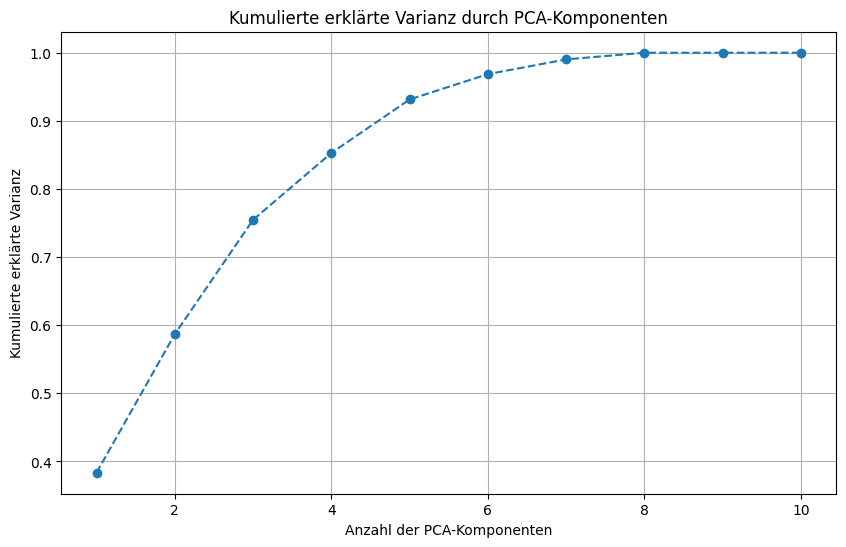

,PCA1,PCA2,PCA3,PCA4
0,3.063107,0.276662,-1.562156,-0.734605
1,1.022994,0.172274,-0.868084,-0.808407
2,1.298694,-0.020018,-0.534308,-0.932472
3,0.325469,0.106353,-0.420288,-0.921897
4,2.056049,0.259664,-1.631227,-0.385892


In [252]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Auswahl der Features für die PCA
features_for_pca = ['price', 'Anzahl Teile', 'Verpackungsbreite', 'Verpackungstiefe', 
                    'Verpackungshöhe', 'Paketgewicht', 'Vorgeschlagenes Geschlecht_ Junge ',
                    'Vorgeschlagenes Geschlecht_ Junge/Mädchen ', 'Material_ Kunststoff ', 
                    'Material_nan']

# Anwendung der PCA
pca = PCA()
pca.fit(lego_data_scaled[features_for_pca])

# Kumulierte erklärte Varianz
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Diagramm der kumulierten erklärten Varianz
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Kumulierte erklärte Varianz durch PCA-Komponenten')
plt.xlabel('Anzahl der PCA-Komponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.grid(True)
plt.show()

cumulative_variance

# Extraktion der ersten vier PCA-Komponenten
pca = PCA(n_components=4)
pca_features = pca.fit_transform(lego_data_scaled[features_for_pca])



# Konvertierung der PCA-Features in einen DataFrame für die weitere Analyse
pca_features_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

pca_features_df.head()



In [253]:
from sklearn.cluster import KMeans

# Anwendung des k-Means Clustering mit k = 3
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_features_df)

# Hinzufügen der Clusterzuweisungen zum DataFrame
pca_features_df['Cluster'] = clusters

# Überprüfung der Clusterzuweisungen
cluster_counts = pca_features_df['Cluster'].value_counts()
cluster_centers = kmeans.cluster_centers_

cluster_counts, cluster_centers



c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0    641
 1      1
 Name: Cluster, dtype: int64,
 array([[-4.30894833e-02,  3.44883564e-02, -2.67242954e-02,
         -1.63255498e-03],
        [ 2.76203588e+01, -2.21070365e+01,  1.71302733e+01,
          1.04646775e+00]]))

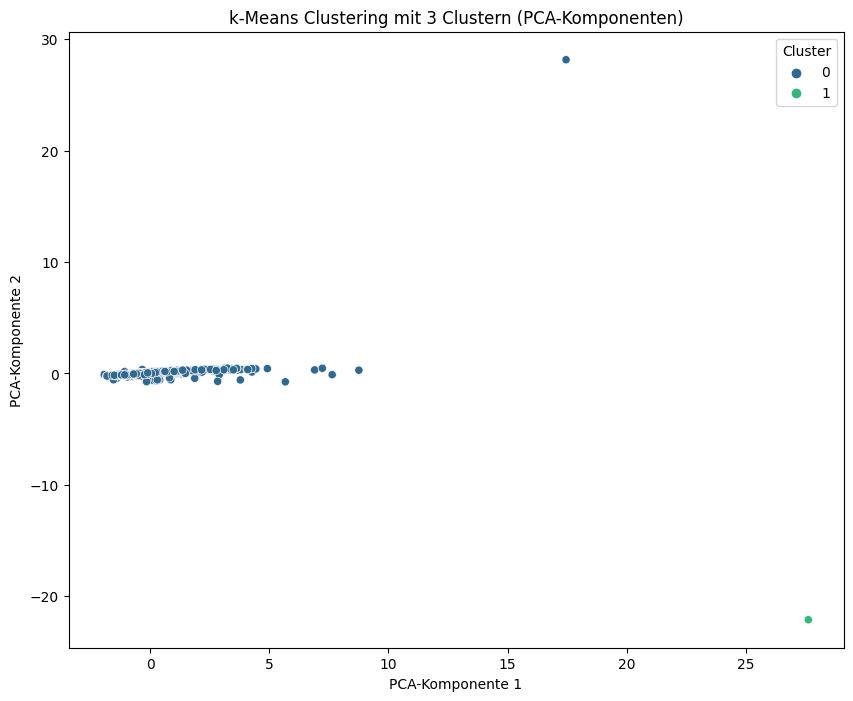

In [254]:
import seaborn as sns

# Visualisierung der Cluster in den ersten beiden PCA-Komponenten
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_features_df, palette='viridis')
plt.title('k-Means Clustering mit 3 Clustern (PCA-Komponenten)')
plt.xlabel('PCA-Komponente 1')
plt.ylabel('PCA-Komponente 2')
plt.legend(title='Cluster')
plt.show()



c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csa

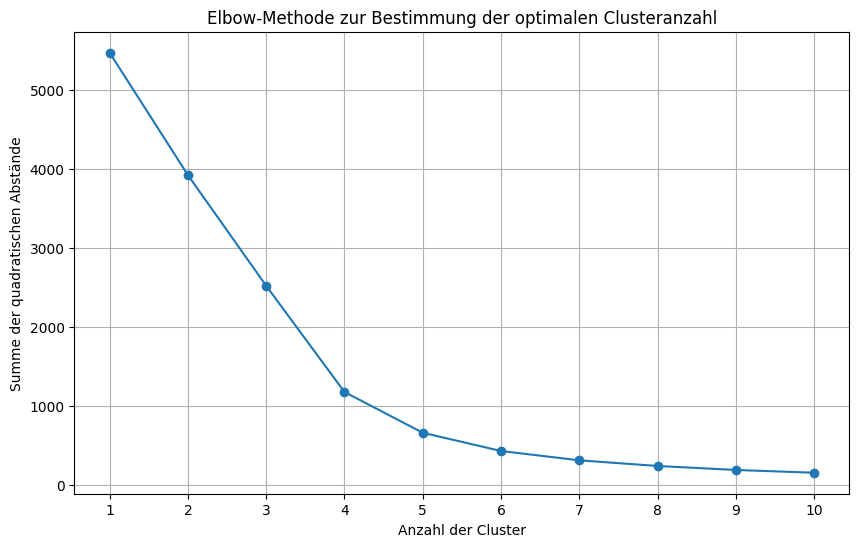

In [255]:
# Bestimmung der optimalen Anzahl von Clustern für k-Means
# Verwendung der Elbow-Methode

# Leerer Array zur Speicherung der Summe der quadratischen Abstände
sse = []

# Berechnung der Summe der quadratischen Abstände für eine Reihe von Cluster-Anzahlen
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']])
    sse.append(kmeans.inertia_)

# Visualisierung des Elbow-Diagramms
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Summe der quadratischen Abstände')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\csa

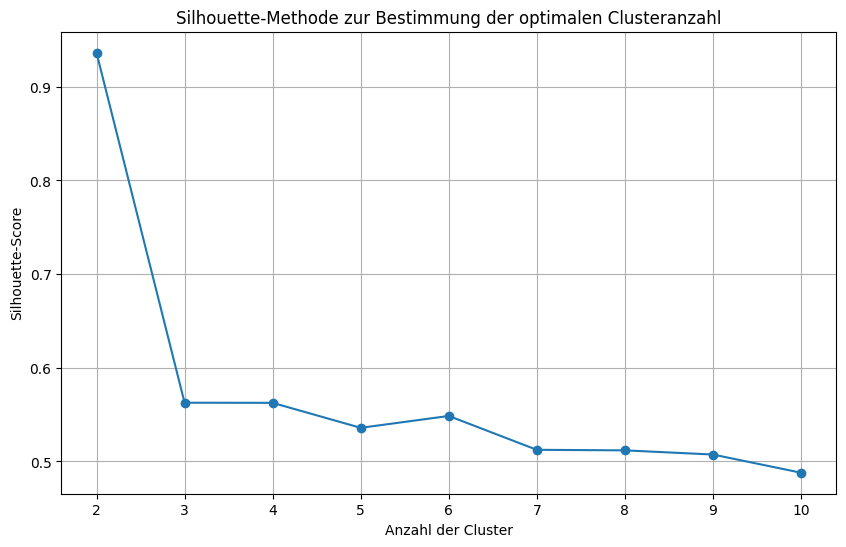

In [256]:
# Bestimmung der optimalen Anzahl von Clustern für k-Means
# Verwendung der Shilouette-Methode

from sklearn.metrics import silhouette_score

# Leerer Array zur Speicherung der Silhouette-Scores
silhouette_scores = []

# Berechnung der Silhouette-Scores für eine Reihe von Cluster-Anzahlen
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']])
    silhouette_scores.append(silhouette_score(pca_features_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']], kmeans.labels_))

# Visualisierung des Silhouette-Diagramms
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Silhouette-Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

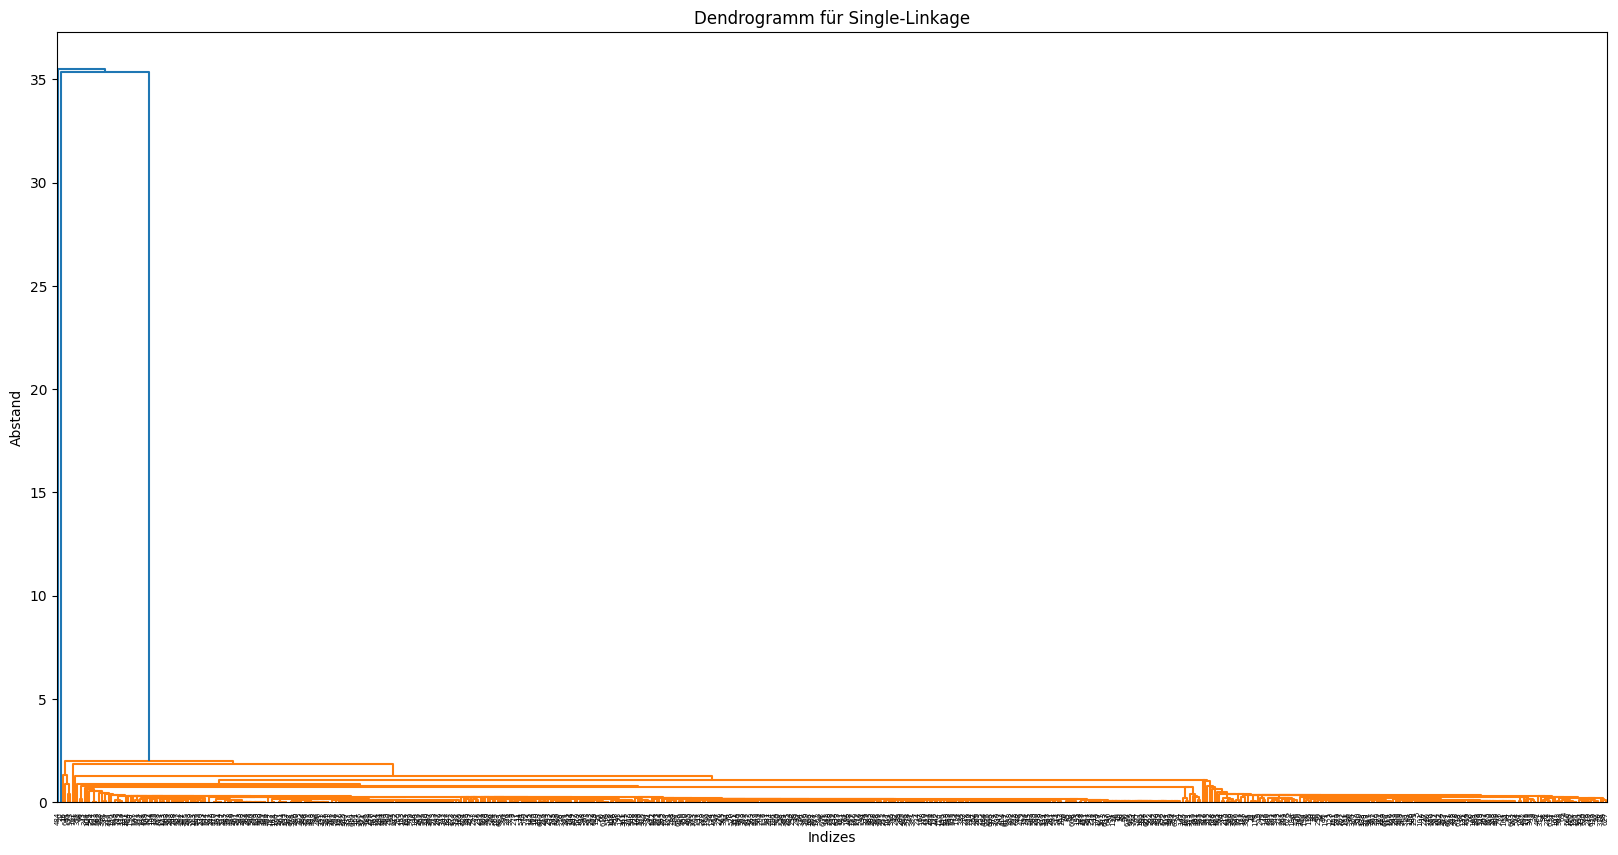

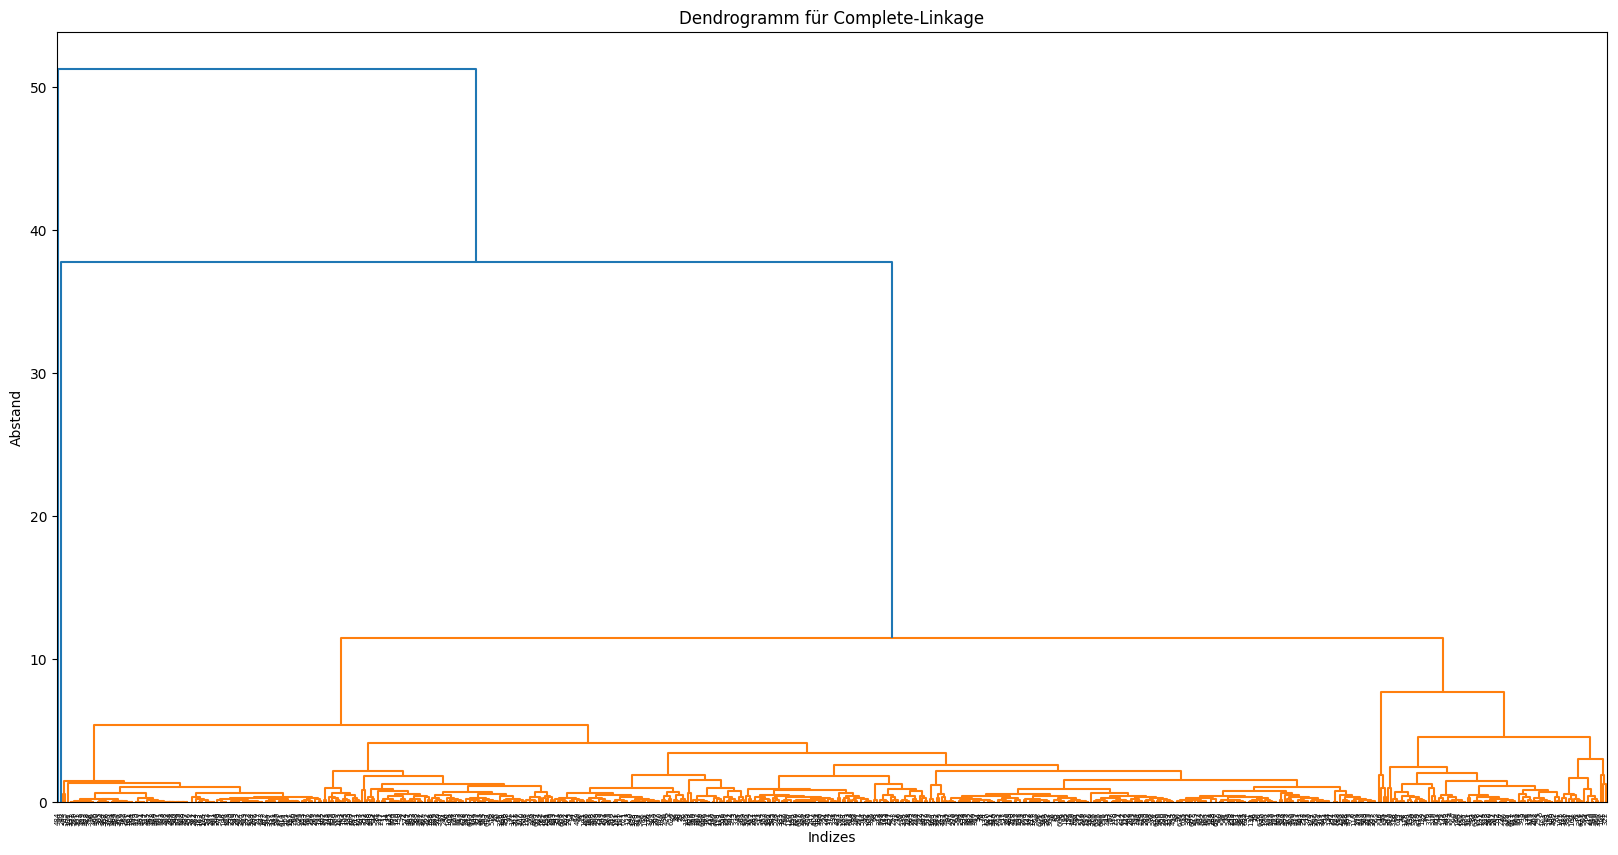

In [257]:
# Wende jezt Hirarchisches Clustering an
from scipy.cluster.hierarchy import dendrogram, linkage

# Anwendung der hierarchischen Clusteranalyse mit der Single-Linkage-Methode
single_linkage = linkage(pca_features_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']], method='single')

# Visualisierung des Dendrogramms
plt.figure(figsize=(20, 10))
dendrogram(single_linkage)
plt.title('Dendrogramm für Single-Linkage')
plt.xlabel('Indizes')
plt.ylabel('Abstand')
plt.show()

# Anwendung der hierarchischen Clusteranalyse mit der Complete-Linkage-Methode
complete_linkage = linkage(pca_features_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']], method='complete')

# Visualisierung des Dendrogramms
plt.figure(figsize=(20, 10))
dendrogram(complete_linkage)
plt.title('Dendrogramm für Complete-Linkage')
plt.xlabel('Indizes')
plt.ylabel('Abstand')
plt.show()